In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import sin, cos, pi
import numpy as np

f_x = open("../build/output/x_vals.txt")
f_y = open("../build/output/y_vals.txt")
f_psi = open("../build/output/psi_vals.txt")
f_v = open("../build/output/v_vals.txt")

x_string = f_x.readlines()[1].split(" ")[:-1]
y_string = f_y.readlines()[1].split(" ")[:-1]
psi_string = f_psi.readlines()[1].split(" ")[:-1]
v_string = f_v.readlines()[1].split(" ")[:-1]

f_x.close()
f_y.close()
f_psi.close()
f_v.close()
# print(type(x_string), type(x_string[0]))

x_data = [float(x) for x in x_string]
# print(type(x_data), type(x_data[0]))
y_data = [float(x) for x in y_string]
psi_data = [float(x) for x in psi_string]
v_data = [float(x)*0.44704 for x in v_string]

# print(v_data)
# dt = 0
# for i in range(5,len(v_data)):
#     delta_v = v_data[i] - v_data[i-1]
#     dt = delta_v/0.5
#     print(dt)
# dt4 = (x_data[5] - x_data[4]) / (v_data[4] * cos(psi_data[4]))
# dt5 = (x_data[6] - x_data[5]) / (v_data[5] * cos(psi_data[5]))
# dt6 = (x_data[7] - x_data[6]) / (v_data[6] * cos(psi_data[6]))

# dt4_ = (y_data[5] - y_data[4]) / (v_data[4] * sin(psi_data[4]))
# dt5_ = (y_data[6] - y_data[5]) / (v_data[5] * sin(psi_data[5]))
# dt6_ = (y_data[7] - y_data[6]) / (v_data[6] * sin(psi_data[6]))


# a4 = (v_data[5] - v_data[4]) / dt4
# a5 = (v_data[6] - v_data[5]) / dt5
# a6 = (v_data[7] - v_data[6]) / dt6

# print("a4:", a4,"\n")
# print("a5:", a5,"\n")
# print("a6:", a6,"\n")
# print(dt4-dt4_, dt5-dt5_, dt6-dt6_)

## TODO
# 用x和y反推平均值算dt，用vt和dt算at，delta已经有了，然后就可以进入优化问题的大坑了


In [4]:
# f_x_ = open("../build/output/x_vals.txt")
# f_y_ = open("../build/output/y_vals.txt")
# f_psi_ = open("../build/output/psi_vals.txt")
# f_v_ = open("../build/output/v_vals.txt")

# x_string = f_x.readlines()[1].split(" ")[:-1]
# y_string = f_y.readlines()[1].split(" ")[:-1]
# psi_string = f_psi.readlines()[1].split(" ")[:-1]
# v_string = f_v.readlines()[1].split(" ")[:-1]

# f_x.close()
# f_y.close()
# f_psi.close()
# f_v.close()
# # print(type(x_string), type(x_string[0]))

# x_data = [float(x) for x in x_string]
# # print(type(x_data), type(x_data[0]))
# y_data = [float(x) for x in y_string]
# psi_data = [float(x) for x in psi_string]
# v_data = [float(x)*0.44704 for x in v_string]

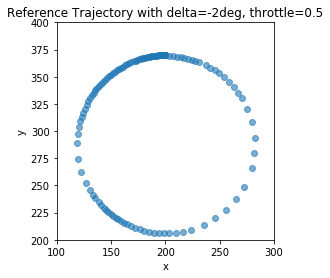

In [2]:
fig = plt.figure()
ax = plt.gca()
ax.set_aspect('equal')
plt.title('Reference Trajectory with delta=-2deg, throttle=0.5')
plt.scatter(x_data[:-16], y_data[:-16], alpha=0.6)

plt.xlim(100,300)
plt.ylim(200,400)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


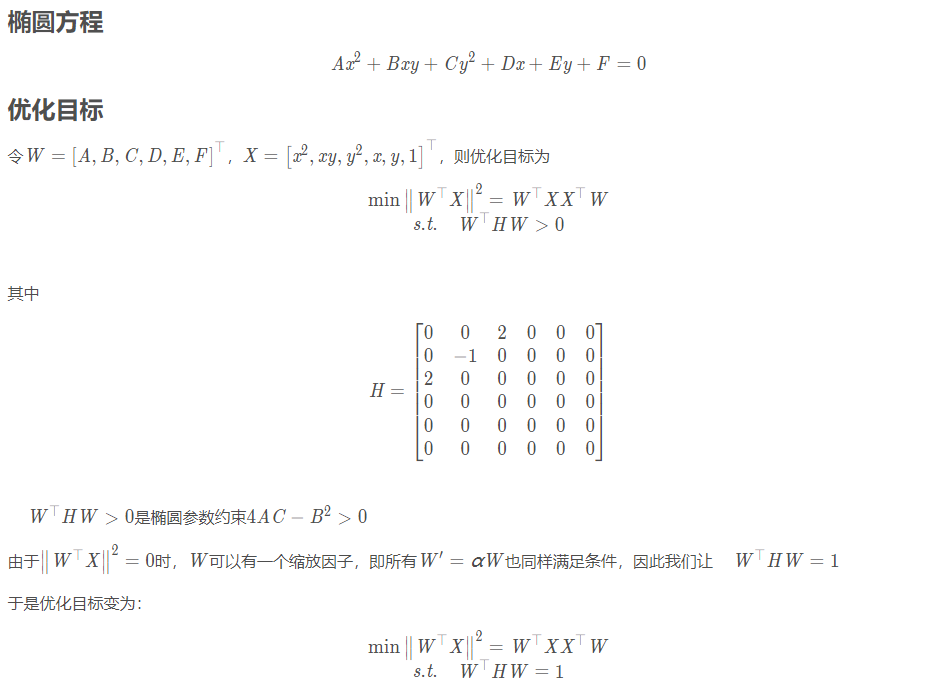

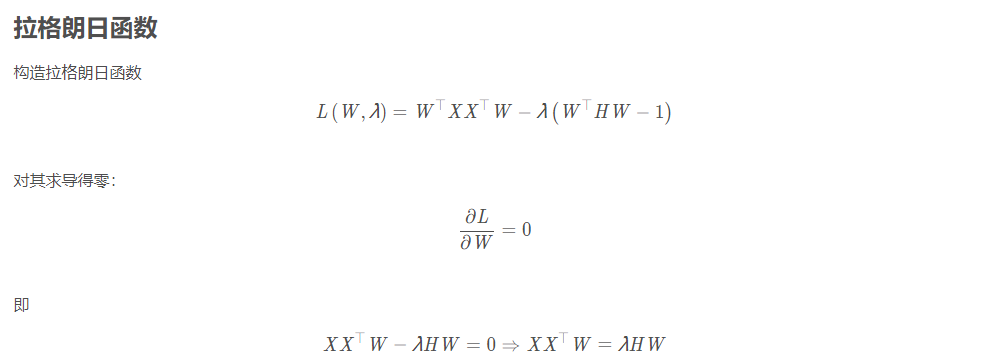

In [3]:
import scipy.linalg as linalg

e = 1e-10

def  ellipses(x, a, b, c, d, e, f):
    return a*x[0] + b*x[1] + c*x[2] + d*x[3] + e*x[4] + f*X[5]

X_1 = np.multiply(x_data, x_data)
X_2 = np.multiply(x_data, y_data)
X_3 = np.multiply(y_data, y_data)
X_4 = np.array(x_data)
X_5 = np.array(y_data)
X_6 = np.ones((X_1.shape[0],))


X = np.array([X_1, X_2, X_3, X_4, X_5, X_6])
S = np.dot(X, X.transpose())
H = np.zeros((6,6))
H[0][2] = -2
H[2][0] = -2
H[1][1] = 1

L, V = linalg.eig(S, H)
print(L)
print(V)

print(np.dot(np.dot(V[0].transpose(), H), V[0]))
# W = np.sqrt(1/np.dot(np.dot(V[0].transpose(), H), V[0])) * V[0]
# print(W)
W = V[:,0]
res = ellipses(X, W[0], W[1], W[2], W[3], W[4], W[5])
print(res)

[-7.35222545e+04+0.j  5.64540303e+08+0.j  4.95868564e+08+0.j
             inf+0.j             inf+0.j             inf+0.j]
[[-8.61590564e-06  6.18504657e-06  1.59830326e-05 -1.98685118e-20
   8.64564869e-21  4.02984058e-21]
 [-2.71238034e-08 -1.24061513e-05  3.16809019e-05  3.55718798e-21
   8.17842426e-21 -1.15238783e-21]
 [-8.56377479e-06 -6.16715169e-06 -1.58364591e-05  2.55470773e-22
  -8.17842426e-21 -2.30477565e-21]
 [ 3.46526623e-03  1.38574569e-03 -1.57110363e-02  1.17064806e-02
  -1.04650492e-02 -1.07940241e-03]
 [ 4.93334541e-03  5.97251657e-03  3.53502470e-03 -2.86513462e-04
   2.86517405e-04 -6.37179199e-03]
 [-9.99981827e-01 -9.99981204e-01  9.99870324e-01 -9.99931436e-01
   9.99945199e-01  9.99979117e-01]]
5.890880036429976e-10
[-6.14936273e-04 -6.14936273e-04 -6.15043932e-04 -6.12902890e-04
 -6.11222782e-04 -6.08017173e-04 -6.03940516e-04 -5.97683898e-04
 -5.92007028e-04 -5.83195830e-04 -5.74684179e-04 -5.63845545e-04
 -5.50849690e-04 -5.39426665e-04 -5.23486457e-04 -5.0

(139, 139)


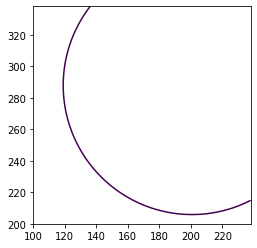

In [4]:
xrange = np.arange(100, 239, 1)
yrange = np.arange(200, 339, 1)
x_mesh, y_mesh = np.meshgrid(xrange,yrange)

def ellip(xy, a, b, c, d, e, f):
    x, y = xy
    
    return x*x*a + x*y*b + y*y*c + x*d + y*e + f

x_1 = np.multiply(xrange, xrange)
x_2 = np.multiply(xrange, yrange)
x_3 = np.multiply(yrange, yrange)
x_4 = np.array(xrange)
x_5 = np.array(yrange)
x_6 = np.ones((x_1.shape[0],))


x = np.array([x_1, x_2, x_3, x_4, x_5, x_6])
z = ellip((x_mesh, y_mesh), W[0], W[1], W[2], W[3], W[4], W[5])
print(z.shape)
fig_1 = plt.figure(1)
plt.contour(x_mesh, y_mesh, z, [0])
p_ax = fig_1.gca()
p_ax.set_aspect('equal')
plt.show()

In [5]:
def solve_ellipse(A,B,C,D,E,F):
            
    Xc = (B*E-2*C*D)/(4*A*C-B**2)
    Yc = (B*D-2*A*E)/(4*A*C-B**2)
        
    FA1 = 2*(A*Xc**2+C*Yc**2+B*Xc*Yc-F)
    FA2 = np.sqrt((A-C)**2+B**2)
    
    MA = np.sqrt(FA1/(A+C+FA2)) #长轴
    SMA= np.sqrt(FA1/(A+C-FA2)) if A+C-FA2!=0 else 0#半长轴
    
    if B==0 and F*A<F*C:
        Theta = 0
    elif B==0 and F*A>=F*C:
        Theta = 90
    elif B!=0 and F*A<F*C:
        alpha = np.arctan((A-C)/B)*180/np.pi
        Theta = 0.5*(-90-alpha) if alpha<0 else 0.5*(90-alpha)
    else:
        alpha = np.arctan((A-C)/B)*180/np.pi
        Theta = 90+0.5*(-90-alpha) if alpha<0 else 90+0.5*(90-alpha)
            
    if MA<SMA:
        MA,SMA = SMA,MA
            
    return [Xc,Yc,MA,SMA,Theta]

In [6]:
ellipse_par = solve_ellipse(W[0], W[1], W[2], W[3], W[4], W[5])
print(ellipse_par)

[200.64415569442306, 287.71793359220453, 81.86193900856223, 81.58239842037916, 103.74403295516152]


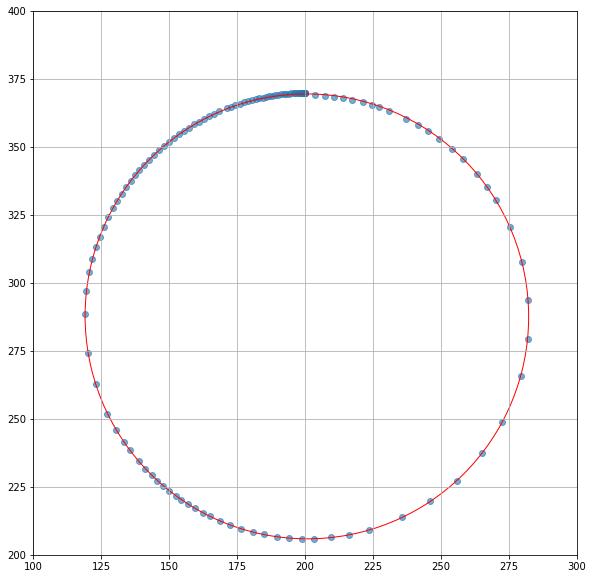

In [7]:
from matplotlib.patches import Ellipse

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,aspect = 'equal')

e = Ellipse(xy = (ellipse_par[0],ellipse_par[1]), width = ellipse_par[2] * 2, 
           height = ellipse_par[3] * 2, angle = ellipse_par[4])

e.set_facecolor("none")
e.set_edgecolor('red')

ax.add_artist(e)
ax.grid(True)
plt.xlim(100,300)
plt.ylim(200,400)
plt.scatter(x_data[:-16], y_data[:-16], alpha=0.6)
plt.show()

kinematic model of the vehicle motion

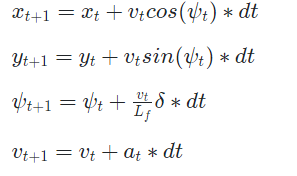

initial state:x_data[0], y_data[0], psi_data[0], v_data[0]
const delta = -2deg, const a = 0.5

curve information: 200.64415569442306, 287.71793359220453, 81.86193900856223, 81.58239842037916 stored in ellipse_par

to be estimated Lf

In [11]:
from scipy.optimize import minimize

def costfunc(x):
    cost = 0
    for i in range(200):
        cost += (np.sqrt(((x[i] - x_c)**2 + (x[i+200] - y_c)**2)) - r_c)**2
    return cost

ex = np.linspace(100, 300, 200)
ey = np.ones(200) * 200
x0 = np.concatenate((ex, ey))

r_c = (ellipse_par[2] + ellipse_par[3]) / 2
x_c = ellipse_par[0]
y_c = ellipse_par[1]
bounds = []
for i in range(200):
    bounds.append((ex[i], ex[i]))
for i in range(200, 400):
    bounds.append((200, 300))
# print(bounds)
res = minimize(costfunc, x0, method = 'SLSQP', bounds=bounds, tol=1e-6,
              options={'disp':True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4406.202945958668
            Iterations: 59
            Function evaluations: 23719
            Gradient evaluations: 59


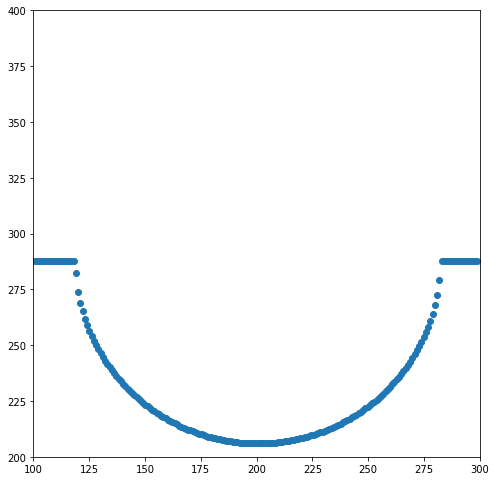

In [12]:
res.x.shape
fig = plt.figure(figsize=(8,10))
ax = fig.gca()
ax.set_aspect('equal')
plt.scatter(res.x[0:199], res.x[200:399])
plt.xlim(100,300)
plt.ylim(200,400)
plt.show()

In [13]:
# set initial parameters

N = 4 # 200 individual parameters for each states
delta = np.deg2rad(-2.0)
a = 0.5
dt = 0.1 # time step

def cost_Lf(x):
    cost = 0
    for i in range(N):
        cost += (np.sqrt((x[i] - x_c)**2 + (x[i+N] - y_c)**2)-r_c)**2
    return cost

# create index for individual states and concatenated array vars_

x_start = 0
y_start = x_start + N
psi_start = y_start + N
v_start = psi_start + N
Lf_start = v_start + N
n_variables = 4 * N + 1
vars_ = np.ones(n_variables)


# initial state

vars_[x_start] = x_data[20]
vars_[y_start] = y_data[20]
vars_[psi_start] = psi_data[20]
vars_[v_start] = v_data[20]
vars_[Lf_start] = 1.0


# boundry conditions for variables, stored in form ((lb,ub),(lb,ub),(lb,ub),...)

bounds = []

for i in range(x_start, x_start + N):
    bounds.append((100, 300))
for i in range(y_start, y_start + N):
    bounds.append((200, 400))
for i in range(psi_start, psi_start + N):
    bounds.append((0, 2*pi))
for i in range(v_start, v_start + N):
    bounds.append((0, 1e9))
bounds.append((0.5, 5.0))

# constraints for variables according to the update functions

# cons is a tuple of dict, each dict is in form
# {'type': 'eq', 'fun': lambda x: }
# cons = []
# dic_1 = {'type':'eq', 'fun': lambda x: x + 1}
# dic_2 = {'type':'eq', 'fun': lambda x: x + 2}
# cons.append(dic_1)
# cons.append(dic_2)
# x0 = vars_[x_start + i - 1]
# x1 = vars_[x_start + i]
# y0 = vars_[y_start + i - 1]
# y1 = vars_[y_start + i]
# psi0 = vars_[psi_start + i - 1]
# psi1 = vars_[psi_start + i]
# v0 = vars_[v_start + i - 1]
# v1 = vars_[v_start + i]
def x_cons(vars_):
    x0 = vars_[x_start + i - 1]
    x1 = vars_[x_start + i]
    psi0 = vars_[psi_start + i - 1]
    v0 = vars_[v_start + i - 1]
    return x1 - (x0 + v0 * cos(psi0) * dt)
def grad_x_cons(vars_):
    psi0 = vars_[psi_start + i - 1]
    v0 = vars_[v_start + i - 1]
    grad = np.zeros(len(vars_))
    grad[x_start+i-1] = -1
    grad[x_start+i] = 1
    grad[v_start+i-1] = -dt*cos(psi0)
    grad[psi_start+i-1] = dt*v0*sin(psi0)
    return grad

def y_cons(vars_):
    y0 = vars_[y_start + i - 1]
    y1 = vars_[y_start + i]
    psi0 = vars_[psi_start + i - 1]
    v0 = vars_[v_start + i - 1]
    return y1 - (y0 + v0 * sin(psi0) * dt)
def grad_y_cons(vars_):
    psi0 = vars_[psi_start + i - 1]
    v0 = vars_[v_start + i - 1]
    grad = np.zeros(len(vars_))
    grad[y_start+i-1] = -1
    grad[y_start+i] = 1
    grad[v_start+i-1] = -dt*sin(psi0)
    grad[psi_start+i-1] = -dt*v0*cos(psi0)
    return grad

def psi_cons(vars_):
    psi0 = vars_[psi_start + i - 1]
    psi1 = vars_[psi_start + i]
    v0 = vars_[v_start + i - 1]
    Lf = vars_[Lf_start]
    return psi1 - (psi0 + v0 * delta * dt / Lf)

def grad_psi_cons(vars_):
    Lf = vars_[Lf_start]
    v0 = vars_[v_start + i - 1]
    grad = np.zeros(len(vars_))
    grad[psi_start+i-1] = -1
    grad[psi_start+i] = 1
    grad[v_start+i-1] = -dt*delta/Lf
    grad[Lf_start] = delta*dt*v0/Lf**2
    return grad

def v_cons(vars_):
    v0 = vars_[v_start + i - 1]
    v1 = vars_[v_start + i]
    return v1 - (v0 + a * dt)
def grad_v_cons(vars_):
    grad = np.zeros(len(vars_))
    grad[v_start+i-1] = -1
    grad[v_start+i] = 1
    return grad

cons = []
for i in range(1, N):
    # call *_cons functions
#     dic_x = {'type':'eq', 'fun': 
#              lambda x: x[x_start+i] - (x[x_start+i-1]+x[v_start+i-1]*
#                                       cos(x[psi_start+i-1])*dt)}
#     cons.append(dic_x)
#     dic_y = {'type':'eq', 'fun':
#             lambda x: x[y_start+i] - (x[y_start+i-1]+x[v_start+i-1]*
#                                       sin(x[psi_start+i-1])*dt)}
#     cons.append(dic_y)
#     dic_psi = {'type':'eq', 'fun':
#                lambda x: x[psi_start+i] - (x[psi_start+i-1]+x[v_start+i-1]*
#                                       delta*dt/x[Lf_start])}
#     cons.append(dic_psi)
#     dic_v = {'type':'eq', 'fun':
#             lambda x: x[v_start+i] - (x[v_start+i-1]+a*dt)}
#     call *_cons functions
    dic_x = {'type':'eq', 'fun': x_cons, 'jac': grad_x_cons}
    cons.append(dic_x)
    dic_y = {'type':'eq', 'fun': y_cons, 'jac': grad_y_cons}
    cons.append(dic_y)
    dic_psi = {'type':'eq', 'fun': psi_cons, 'jac': grad_psi_cons}
    cons.append(dic_psi)
    dic_v = {'type':'eq', 'fun': v_cons, 'jac': grad_v_cons}
    cons.append(dic_v)

res = minimize(cost_Lf, vars_, method = 'SLSQP', bounds=bounds, 
               constraints=cons, tol=1e-6, options={'disp':True})
    
    

Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: 8044.69730442235
            Iterations: 1
            Function evaluations: 19
            Gradient evaluations: 1


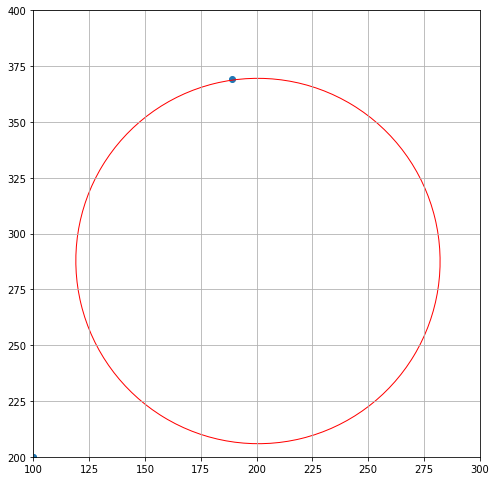

In [14]:
# print(res.x)
fig = plt.figure(figsize=(8,10))
ax = fig.gca()
ax.set_aspect('equal')
plt.scatter(res.x[0:N-1], res.x[N:2*N-1])
e = Ellipse(xy = (ellipse_par[0],ellipse_par[1]), width = ellipse_par[2] * 2, 
           height = ellipse_par[3] * 2, angle = ellipse_par[4])

e.set_facecolor("none")
e.set_edgecolor('red')
ax.add_artist(e)
ax.grid(True)
plt.xlim(100,300)
plt.ylim(200,400)
plt.show()


In [15]:
from sympy import symbols
import sympy as sym

x = x0,x1,y0, y1, v0,v1,psi0,psi1, a, dt, delta, Lf = symbols("x_0, x_1, y0, y1, v_0, v_1, psi_0 \
                                             psi_1, a, dt, delta, Lf")
state = x0, x1, y0, y1, v0, v1, psi0, psi1, Lf

xCons = x1 - (x0+v0*sym.cos(psi0)*dt)
yCons = y1 - (y0+v0*sym.sin(psi0)*dt)
psiCons = psi1 - (psi0 + v0 * delta * dt / Lf)
vCons = v1 - (v0 + a * dt)

x_grad = [sym.diff(xCons,x_) for x_ in state]
y_grad = [sym.diff(yCons,x_) for x_ in state]
psi_grad = [sym.diff(psiCons,x_) for x_ in state]
v_grad = [sym.diff(vCons,x_) for x_ in state]
print("x_grad:", x_grad, "\n")
print("y_grad:", y_grad, "\n")
print("psi_grad:", psi_grad, "\n")
print("v_grad:", v_grad, "\n")

x_grad: [-1, 1, 0, 0, -dt*cos(psi_0), 0, dt*v_0*sin(psi_0), 0, 0] 

y_grad: [0, 0, -1, 1, -dt*sin(psi_0), 0, -dt*v_0*cos(psi_0), 0, 0] 

psi_grad: [0, 0, 0, 0, -delta*dt/Lf, 0, -1, 1, delta*dt*v_0/Lf**2] 

v_grad: [0, 0, 0, 0, -1, 1, 0, 0, 0] 



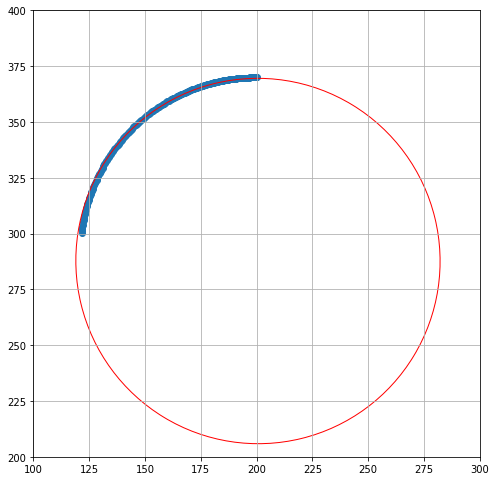

In [24]:
# print(x_data[0], y_data[0], psi_data[0], v_data[0])
N=200
dt=0.09
delta=2/180*pi
a=0.5
Lf0=2.73997

x_0 = np.zeros(N)
y_0 = np.zeros(N)
psi_0 = np.zeros(N)
v_0 = np.zeros(N)

x_0[0] = x_data[0]
y_0[0] = y_data[0]
psi_0[0] = psi_data[0]
v_0[0] = v_data[0]

for i in range(1,N):
    x_0[i] = x_0[i-1] + v_0[i-1] * dt * cos(psi_0[i-1])
    y_0[i] = y_0[i-1] + v_0[i-1] * dt * sin(psi_0[i-1])
    psi_0[i] = psi_0[i-1] + v_0[i-1] * delta * dt / Lf0
    v_0[i] = v_0[i-1] + a * dt

e = Ellipse(xy = (ellipse_par[0],ellipse_par[1]), width = ellipse_par[2] * 2, 
           height = ellipse_par[3] * 2, angle = ellipse_par[4])

e.set_facecolor("none")
e.set_edgecolor('red')
fig = plt.figure(figsize=(8,10))
ax = fig.gca()
plt.scatter(x_0, y_0)
ax.add_artist(e)

ax.set_aspect('equal')
ax.grid(True)
plt.xlim(100,300)
plt.ylim(200,400)
plt.show()

Lf:2.73997


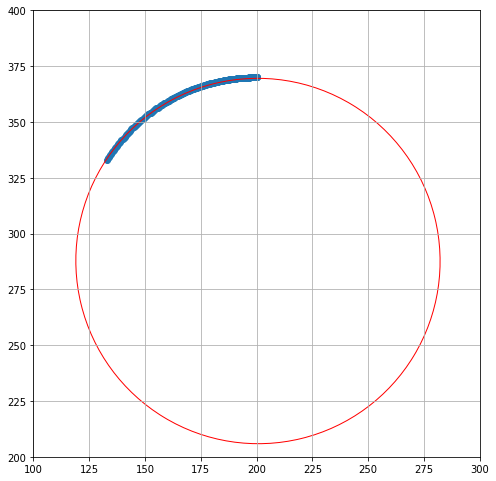

In [17]:
# output_values = open("../build/value_output.txt")
# s_values = output_values.readlines()
# output_values.close()
with open("../build/value_output.txt") as f:
    s_values = f.readlines()

s_x = s_values[1].split(" ")[:-1]
s_y = s_values[3].split(" ")[:-1]
print(s_values[8])
x_out_data = [float(x) for x in s_x]
y_out_data = [float(x) for x in s_y]
ell = Ellipse(xy = (ellipse_par[0],ellipse_par[1]), width = ellipse_par[2] * 2, 
           height = ellipse_par[3] * 2, angle = ellipse_par[4])

ell.set_facecolor("none")
ell.set_edgecolor('red')
fig = plt.figure(figsize=(8,10))
axis = fig.gca()
plt.scatter(x_out_data, y_out_data)
axis.add_artist(ell)

axis.set_aspect('equal')
axis.grid(True)
plt.xlim(100,300)
plt.ylim(200,400)
plt.show()